In [6]:
import pandas as pd
import numpy as np
import random
import pickle
random.seed(42)
# Load original TMNIST data
df = pd.read_pickle("./dataset/TMNIST_Alphabet.pkl")

# Define allowed labels (digits + uppercase + lowercase)
allowed_labels = set(
    [chr(i) for i in range(ord('0'), ord('9')+1)] +
    [chr(i) for i in range(ord('A'), ord('Z')+1)] +
    [chr(i) for i in range(ord('a'), ord('z')+1)]
)
print(f"Allowed characters: {sorted(allowed_labels)}")
print(f"Total allowed labels: {len(allowed_labels)}")

# Filter fonts that contain ALL 62 allowed characters
font_to_chars = df.groupby('names')['labels'].apply(set)
valid_fonts = font_to_chars[font_to_chars.apply(lambda x: allowed_labels.issubset(x))].index.tolist()

print(f"Fonts with all 62 allowed labels: {len(valid_fonts)}")

# Randomly sample 100 fonts
selected_fonts = random.sample(valid_fonts, 100)

# Filter DataFrame to selected fonts and allowed characters
df_filtered = df[df['names'].isin(selected_fonts) & df['labels'].isin(allowed_labels)]

# Build font-character dictionary: {font_name: {label: image}}
font_char_dict = {}
for name in selected_fonts:
    font_df = df_filtered[df_filtered['names'] == name]
    font_dict = {row['labels']: row['image'] for _, row in font_df.iterrows()}
    font_char_dict[name] = font_dict

# Generate training samples
samples = []
for font_name, char_img_dict in font_char_dict.items():
    labels = list(char_img_dict.keys())
    for _ in range(20):  # Create 20 pairs per font
        style_label, target_label = random.sample(labels, 2)
        style_image = char_img_dict[style_label]
        target_image = char_img_dict[target_label]
        samples.append({
            "font_name": font_name,
            "style_image": style_image,
            "target_label": target_label,
            "target_image": target_image
        })

# Save processed samples
with open("./dataset/font_transfer_dataset_62chars.pkl", "wb") as f:
    pickle.dump(samples, f)

print(f"Saved {len(samples)} training samples.")

Allowed characters: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Total allowed labels: 62
Fonts with all 62 allowed labels: 2874
Saved 2000 training samples.


In [14]:
import matplotlib.pyplot as plt

def visualize_sample_pair(sample, index=None):
    font_name = sample["font_name"]
    style_image = sample["style_image"]
    target_image = sample["target_image"]
    target_label = sample["target_label"]

    plt.figure(figsize=(6, 3))
    plt.suptitle(f"Font: {font_name}, Target Label: {target_label}", fontsize=14)

    plt.subplot(1, 2, 1)
    plt.imshow(style_image, cmap='gray')
    plt.title("Style Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(target_image, cmap='gray')
    plt.title("Target Image")
    plt.axis("off")

    if index is not None:
        plt.savefig(f"sample_pair_{index}.png")
    plt.show()

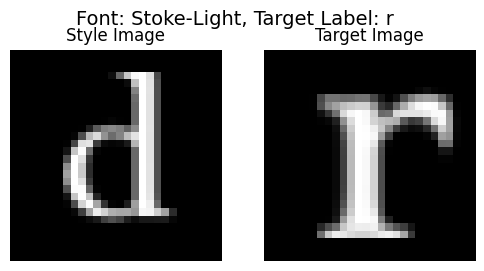

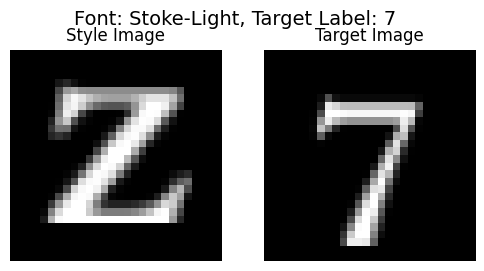

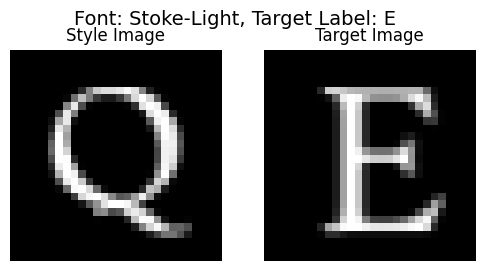

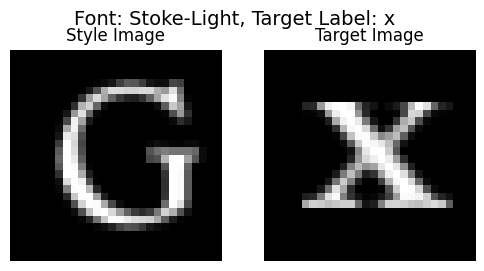

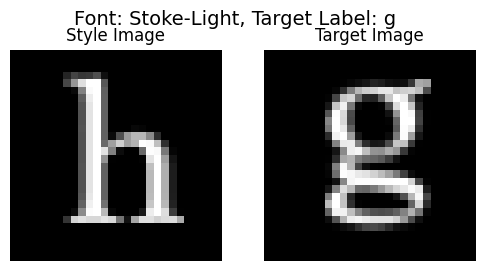

In [16]:
# Load and visualize
with open("./dataset/font_transfer_dataset_62chars.pkl", "rb") as f:
    dataset = pickle.load(f)

# Visualize the first 5 samples
for i in range(5):
    visualize_sample_pair(dataset[i], index=None)

In [17]:
import random
import pickle
random.seed(42)

# Load dataset
with open("./dataset/font_transfer_dataset_62chars.pkl", "rb") as f:
    all_samples = pickle.load(f)

# Shuffle and split
random.shuffle(all_samples)
n_total = len(all_samples)
n_train = int(0.7 * n_total)
n_valid = int(0.2 * n_total)

train_set = all_samples[:n_train]
valid_set = all_samples[n_train:n_train + n_valid]
test_set = all_samples[n_train + n_valid:]

# Save splits
for name, split in zip(['train', 'valid', 'test'], [train_set, valid_set, test_set]):
    with open(f"./data/{name}_font_data.pkl", "wb") as f:
        pickle.dump(split, f)